# Introduction

David and I chose to explore data involving the restaurants of Pittsburgh across different neighborhoods. First, we considered housing data and historical data. The housing data was quite complicated and overwhelming. The historical data was sparce and lacked information. We settled on restaurant data because the information has good readability, and has potential for great submetrics. Additionally, we find the topic interesting and may be able to apply it to our real life, as we can find new food to taste.

# The Metric

Our metric is quality of restaurant experience. This is a broad metric that can be applied to any neighborhood in Pittsburgh. We can measure a variety of features such as pricing, availability, food quality, reviews, health violations, and potentially more. The dataset I will observe is ______. David will investigate _______.

# The Best Neighborhood

## Super Markets

The first dataset I will consider is "Allegheny County Supermarkets & Convenience Stores" from the WPRDC. I will sort the data to only show the supermarkets, and then rank the neighborhoods by how many supermarkets they have.


### Code

In [ ]:
### Setup
import pandas as pd
sm = pd.read_csv("supermarkets.csv")

### Filtering Supermarkets
query_mask=sm["Category"]=="Supermarket"
sm=sm[query_mask]

### Mutating the best zipcodes to their corresponding neighborhood name
sm['Zip']=sm['Zip'].replace([15237],["Ross Township"])
sm['Zip']=sm['Zip'].replace([15146],["Monroeville"])
sm['Zip']=sm['Zip'].replace([15122],["West Mifflin"])
sm['Zip']=sm['Zip'].replace([15131],["McKeesport"])
sm['Zip']=sm['Zip'].replace([15132],["McKeesport"])
sm['Zip']=sm['Zip'].replace([15205],["Crafton"])
sm['Zip']=sm['Zip'].replace([15227],["Brentwood"])
sm['Zip']=sm['Zip'].replace([15235],["Penn Hills"])
sm['Zip']=sm['Zip'].replace([15210],["St. Clair"])
sm['Zip']=sm['Zip'].replace([15236],["Baldwin"])
sm['Zip']=sm['Zip'].replace([15222],["Troy Hill"])
sm['Zip']=sm['Zip'].replace([15206],["Larimer"])
sm['Zip']=sm['Zip'].replace([15147],["Verona"])
sm['Zip']=sm['Zip'].replace([15217],["Squirrel Hill South"])
sm['Zip']=sm['Zip'].replace([15090],["Wexford"])
counts=counts.replace([15090],["Wexford"])

### Reorganzing "Best" data and plotting
counts = sm["Zip"].value_counts()
best=sm["Zip"].value_counts()>3
counts[best].plot.bar(title='Supermarkets by Neighborhood (Min 4)')

### Analysis

Based on the submetric "Number of Supermarkets" to determine a best neighborhood, Ross Township is the best neighborhood. Other top neighborhoods include Monroeville, West Miffline, and McKeesport

## Seat Count in Food Facilities

The next dataset I will consider is "Geocoded Food Facilities" from WPRDC. The submetric I will consider is Oldest Restaurants. I will wrangle the data to get an average seat count of the food facilities labelled as a restaurant, in each neighborhood, and rank them average year of start date.

### Code

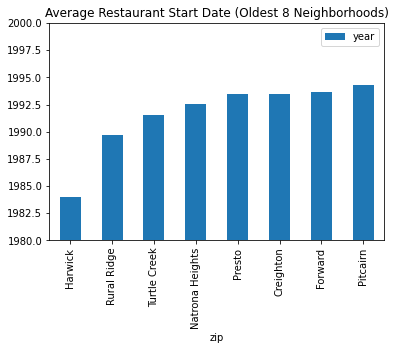

In [168]:
### Setup
import pandas as pd
ff = pd.read_csv("facilities.csv")
ff
### Filtering Allegheny County and NaN values
ff['zip']=ff['zip'].astype(str)
query_mask = ff["zip"].str.match("15")
ff=ff[query_mask]
### Filtering NaN values
ff=ff.dropna(subset=['bus_st_date','zip'])
### Filtering for restaurants
query_mask=ff["description"].str.match("Restaurant")
ff=ff[query_mask]
### Filtering out closed restaurants
ff = ff[ff['bus_cl_date'].isnull()]
### Converting dates to years
ff['year'] = ff['bus_st_date'].str.split("-").str[0]
ff['year']=ff['year'].astype(int)

### Getting averages by zipcode and sorting
averages=ff.groupby('zip', as_index=False)['year'].mean()
averages=averages.sort_values(by=['year'])
averages.head(10)

### Mutating best zipcodes to corresponding neighborhood names
averages['zip']=averages['zip'].replace(["15049.0"],["Harwick"])
averages['zip']=averages['zip'].replace(["15075.0"],["Rural Ridge"])
averages['zip']=averages['zip'].replace(["15145.0"],["Turtle Creek"])
averages['zip']=averages['zip'].replace(["15065.0"],["Natrona Heights"])
averages['zip']=averages['zip'].replace(["15142.0"],["Presto"])
averages['zip']=averages['zip'].replace(["15030.0"],["Creighton"])
averages['zip']=averages['zip'].replace(["15020.0"],["Forward"])
averages['zip']=averages['zip'].replace(["15140.0"],["Pitcairn"])
### Not considering 15068, 15083 as not in Allegheny County
averages=averages.drop(averages.index[2])
averages=averages.drop(averages.index[3])

### Reorganizing and Plotting data
best=averages.year<1994.5
averages[best].plot.bar(x='zip',y='year',ylim=[1980,2000],title='Average Restaurant Start Date (Oldest 8 Neighborhoods)')

### Analysis
We can clearly see the neighborhoods with the average oldest restaurant age in Allegheny County. Harwick easily contains the oldest restaurants and becomes the "best neighborhood" by this metric. Unfortunately, none of the "best neighborhoods" of this metric match the best neighborhoods from my previous metric, supermarket counts. Hopefully David's research may align with some of mine and there will be one or more "best neighborhoods" that exist in multiple metrics.

# Conclusion

